## Lien vers kaggle : 
https://www.kaggle.com/datasets/umairhayat/pizza-data-set-order-detail/data

# Analyse de multiple datasets depuis kaggle 

# Les importations 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go


# Lecture des csv

In [8]:
order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
pizza_types= pd.read_csv('pizza_types.csv',encoding="latin1")
pizzas = pd.read_csv('pizzas.csv')

# Consultation de order_details

In [19]:
order_details.head()
# order_details.isnull().sum()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


# Affichage des graphes

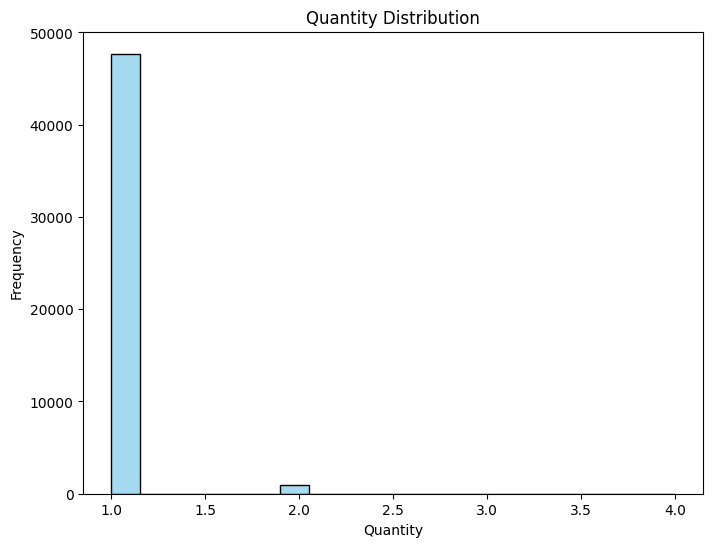

In [33]:
df = order_details

# Plot 1: Pizza Order Frequency (Bar chart with Plotly)
pizza_freq = df['pizza_id'].value_counts().reset_index()
pizza_freq.columns = ['pizza_id', 'frequency']

fig1 = px.bar(pizza_freq, x='pizza_id', y='frequency',
              title='Pizza Order Frequency',
              labels={'pizza_id': 'Pizza ID', 'frequency': 'Number of Orders'},
              template='plotly_dark')

fig1.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels
fig1.show()



# Plot 2: Quantity Distribution (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(df['quantity'], kde=False, bins=20, color='skyblue')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


# Plot 3: Total Quantity per Pizza (Bar chart with Plotly)
pizza_quantity_sum = df.groupby('pizza_id')['quantity'].sum().reset_index()
pizza_quantity_sum = pizza_quantity_sum.sort_values(by='quantity', ascending=False)

fig4 = px.bar(pizza_quantity_sum, x='pizza_id', y='quantity',
              title='Total Quantity Ordered per Pizza',
              labels={'pizza_id': 'Pizza ID', 'quantity': 'Total Quantity'},
              template='plotly_dark')

fig4.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels
fig4.show()





# Consultation du csv orders

In [20]:
orders.head()
# orders.isnull().sum()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


# Affichage des graphes

In [36]:
df = orders
# Convert 'date' and 'time' to datetime format
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
# 1. Orders per day
orders_per_day = df.groupby('date').size().reset_index(name='count')
fig1 = px.bar(orders_per_day, x='date', y='count', title="Orders per Day")
# 2. Orders by Hour of the Day
df['hour'] = df['datetime'].dt.hour
orders_by_hour = df.groupby('hour').size().reset_index(name='count')
fig2 = px.bar(orders_by_hour, x='hour', y='count', title="Orders by Hour of the Day")
# 3. Orders Over Time
fig3 = px.line(df, x='datetime', y='order_id', title="Orders Over Time")

# 4. Orders by Days of the Week
df['day_of_week'] = df['datetime'].dt.day_name()
orders_by_day_of_week = df.groupby('day_of_week').size().reset_index(name='count')
fig4 = px.bar(orders_by_day_of_week, x='day_of_week', y='count', title="Orders by Day of the Week")

# Display the charts
fig1.show()
fig2.show()
fig3.show()
fig4.show()


# Consultation du csv pizza_types

In [21]:
pizza_types.head()
# pizza_types.isnull().sum()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


# Affichage des graphes

In [40]:
df = pizza_types
# Extract ingredients
df['ingredient_list'] = df['ingredients'].apply(lambda x: x.split(', '))
# Flatten all ingredients into a list
all_ingredients = [item for sublist in df['ingredient_list'] for item in sublist]
# Count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)
# Prepare data for plotting
ingredients = list(ingredient_counts.keys())
counts = list(ingredient_counts.values())

# Plot the ingredient frequency using Plotly
fig_bar = px.bar(
    x=counts, 
    y=ingredients, 
    orientation='h', 
    labels={'x':'Count', 'y':'Ingredients'}, 
    title='Frequency of Ingredients in Pizzas',
    height=600
)
fig_bar.show()

# Pie chart for top 5 most frequent ingredients
top_5_ingredients = ingredient_counts.most_common(5)
labels, sizes = zip(*top_5_ingredients)

fig_pie = go.Figure(data=[go.Pie(labels=labels, values=sizes, textinfo='label+percent', 
                                 insidetextorientation='radial', hole=.3)])
fig_pie.update_layout(title_text='Top 5 Ingredients')
fig_pie.show()

# Insights: Look for common ingredient usage and category trends
category_ingredient_summary = df.groupby('category')['ingredient_list'].sum()

print(category_ingredient_summary.apply(lambda x: Counter(x).most_common()))

category
Chicken    [(Red Peppers, 5), (Chicken, 5), (Tomatoes, 4)...
Classic    [(Pepperoni, 4), (Red Onions, 3), (Tomatoes, 3...
Supreme    [(Garlic, 8), (Tomatoes, 6), (Red Onions, 3), ...
Veggie     [(Garlic, 7), (Spinach, 5), (Tomatoes, 5), (Re...
Name: ingredient_list, dtype: object


# Consultatoin du csv pizzas

In [22]:
pizzas.head()
# pizzas.isnull().sum()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


# Affichage du graphe

In [41]:
df = pizzas

# Create a bar chart using Plotly
fig = px.bar(df, x='size', y='price', color='pizza_type_id', 
             title='Pizza Prices by Size and Type',
             labels={'size': 'Pizza Size', 'price': 'Price'},
             barmode='group')

# Show the plot
fig.show()